# <b>N.Sherone (DST 21023)


# Machine Health Forecaster

This work involve into the field of Data Science, Specialy focausing on predictive maintenance within industry 4.0. Using The AI4I(Artificial Intelligence for Industry) Predictive Maintainance Dataset from the UCI Repository, this follows a typical Mechine learning application approach.Initial exploration of the dataset provides essential insights into understanding the ground truth of machine failures. Preprocessing techniques are then applied to prepare the data for predictive modeling. Two primary objectives are pursued: predicting machine failures and determining the nature of faults. By employing various machine learning algorithms, the study aims to achieve accurate predictions for both tasks. Finally, a comprehensive comparison of the model results is conducted, evaluating their performance metrics and interpretability, thus offering valuable guidance for implementing effective predictive maintenance strategies in industrial settings.





# Importing Dataset

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

C:\Users\SHERONE\AppData\Local\Temp\ipykernel_6984\1655483753.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1=pd.read_csv("predictive_maintenance.csv")
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


There are no nul values.So we can perform Exploratory Data Analysis. There for we can drop UDI and Product ID columns because the target values not dependent on these columns.

# Data Preprocessing

In [4]:
df2=df1.copy()
df2.drop(['UDI','Product ID'],axis='columns',inplace=True)

In [5]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA(Exploratory Data Analysis)

In [6]:
df2.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df2.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

converting int columns to float provides flexibility and ensures that the data properly formatted for further analysis.

In [8]:
columns_to_convert = ['Rotational speed [rpm]', 'Tool wear [min]', 'Target']
df2[columns_to_convert] = df2[columns_to_convert].astype('float64')
df2.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Target                     float64
Failure Type                object
dtype: object

In [9]:
df2.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                      'Torque [Nm]',
                                                      'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})


count
Target Failure Type                   
0.0    No Failure                 9643
       Random Failures              18
1.0    Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

the output is the type of failure and the no. of each type of failure.

here there is an inconsistency in data where Target variable is labeled as 1 but the FAilure Type is "No Failure". Let's analyse this further more

In [10]:

df3 = df2[(df2['Target'] == 1) & (df2['Failure Type'] == 'No Failure')].index

It is ood idea to remove these 9  rows. Because it could be go in both ways, failure or no failure.

In [11]:

df2.drop(df3, axis=0, inplace=True)
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,No Failure


In [12]:
df2.shape

(9991, 8)

The dataset is very unbalanced. We need to deal with it.

Lets check where Target=0:

In [13]:
df4 = df2[df2['Target'] == 0]
df4['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [14]:
df4[df4['Failure Type'] == 'Random Failures']


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399.0,46.4,132.0,0.0,Random Failures
1302,L,298.6,309.8,1505.0,45.7,144.0,0.0,Random Failures
1748,H,298.4,307.7,1626.0,31.1,166.0,0.0,Random Failures
2072,L,299.6,309.5,1570.0,35.5,189.0,0.0,Random Failures
2559,L,299.3,309.0,1447.0,50.4,140.0,0.0,Random Failures
3065,M,300.1,309.2,1687.0,27.7,95.0,0.0,Random Failures
3452,H,301.6,310.5,1602.0,32.3,2.0,0.0,Random Failures
5471,L,302.7,312.3,1346.0,61.2,170.0,0.0,Random Failures
5489,L,302.6,312.1,1499.0,35.0,215.0,0.0,Random Failures
5495,H,302.9,312.5,1357.0,55.0,12.0,0.0,Random Failures


Here, instances labeled as Random failure by 'Failed Type but clasified as No Failure by the Target Variable were also removed . It will enhance the accuracy of the dataset

In [15]:
df5 = df4[df4['Failure Type'] == 'Random Failures'].index
df2.drop(df5, axis=0, inplace=True)


In [16]:
df2.shape

(9973, 8)

In [17]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,No Failure


Therefore we removed 27 instances were removed 0.27% data reduced

In [18]:
df2.reset_index(inplace=True, drop=True)

In [19]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,No Failure


c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


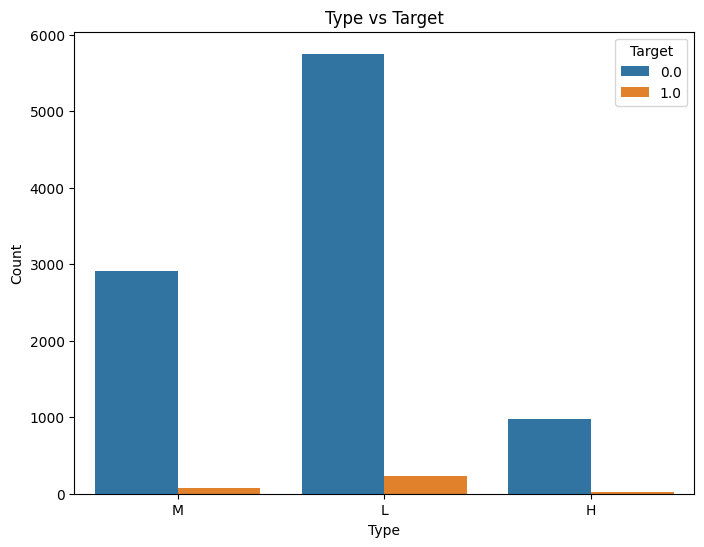

In [20]:
import seaborn as sns
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
cat_cols = ['Type']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Target', data=df2)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

L type mechine are showing more failures than other mechines  also High level mechine are working more accurately.

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

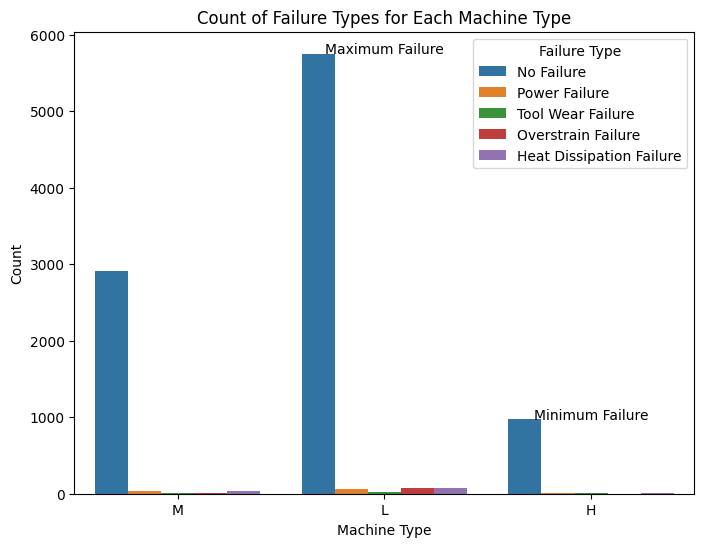

The machine with minimum failures is H
The machine with maximum failures is L


In [21]:
failure=df2.groupby(['Type','Failure Type']).size().unstack(fill_value=0)
min_failure=failure.sum(axis=1).idxmin()
max_failure=failure.sum(axis=1).idxmax()
plt.figure(figsize=(8,6))
sns.countplot(x='Type',hue="Failure Type",data=df2)
plt.text(min_failure[0],failure.loc[min_failure[0]].max(), 'Minimum Failure', ha='center')
plt.text(max_failure[0],failure.loc[max_failure[0]].max(), 'Maximum Failure', ha='center')

plt.title('Count of Failure Types for Each Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.legend(title='Failure Type')
plt.show()


print(f"The machine with minimum failures is {min_failure[0]}")
print(f"The machine with maximum failures is {max_failure[0]}")

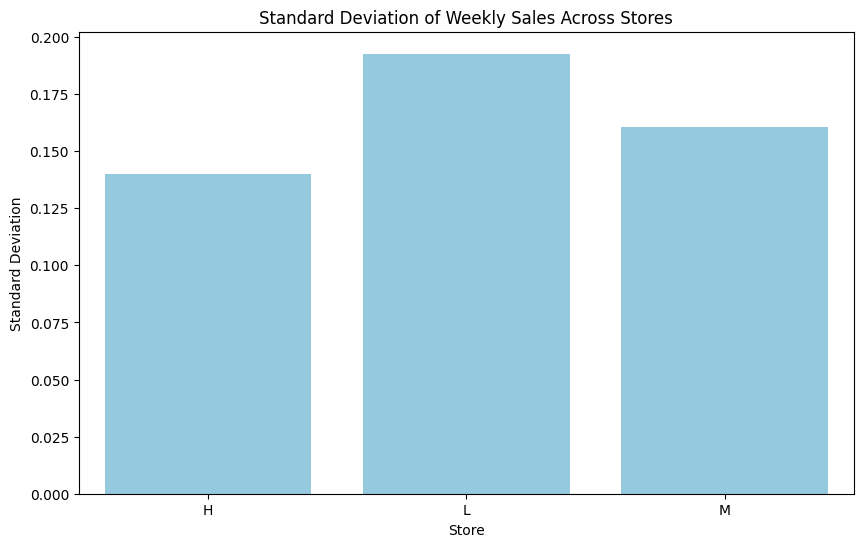

The store with the maximum standard deviation is L with a standard deviation of 0.19
The coefficient of mean to standard deviation is 0.3327


In [22]:
std_dev_by_store = df2.groupby('Type')['Target'].std()


max_std_dev_store = std_dev_by_store.idxmax()


mean_to_std_dev_coefficient = df2.groupby('Type')['Target'].mean().std() / df2.groupby('Type')['Target'].mean().mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=std_dev_by_store.index, y=std_dev_by_store.values, color='skyblue')
plt.title('Standard Deviation of Weekly Sales Across Stores')
plt.xlabel('Store')
plt.ylabel('Standard Deviation')
plt.show()


print(f"The store with the maximum standard deviation is {max_std_dev_store} with a standard deviation of {std_dev_by_store[max_std_dev_store]:,.2f}")
print(f"The coefficient of mean to standard deviation is {mean_to_std_dev_coefficient:.4f}")

# Correlation Analysis

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

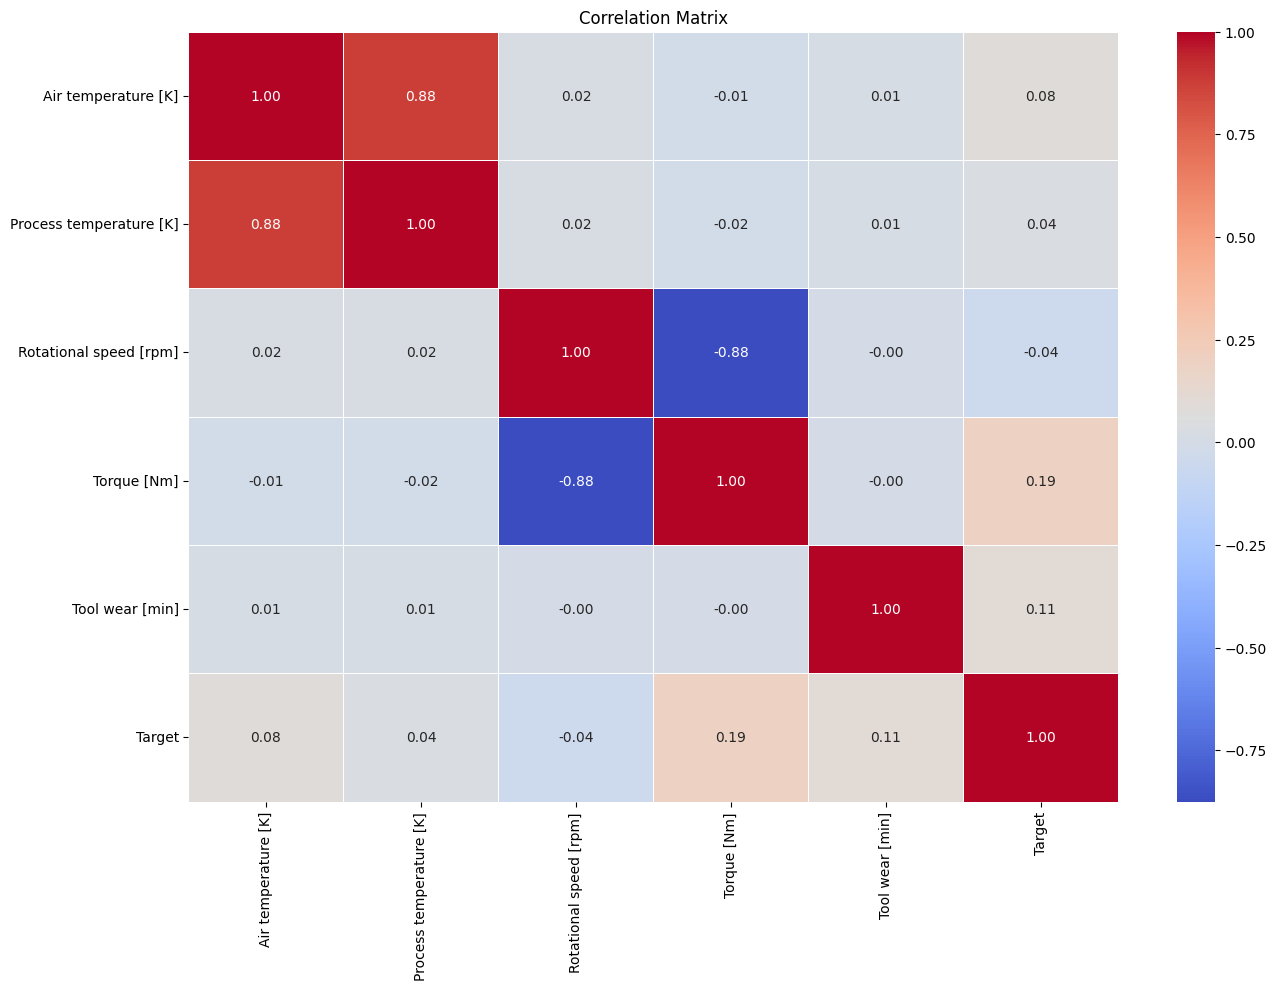

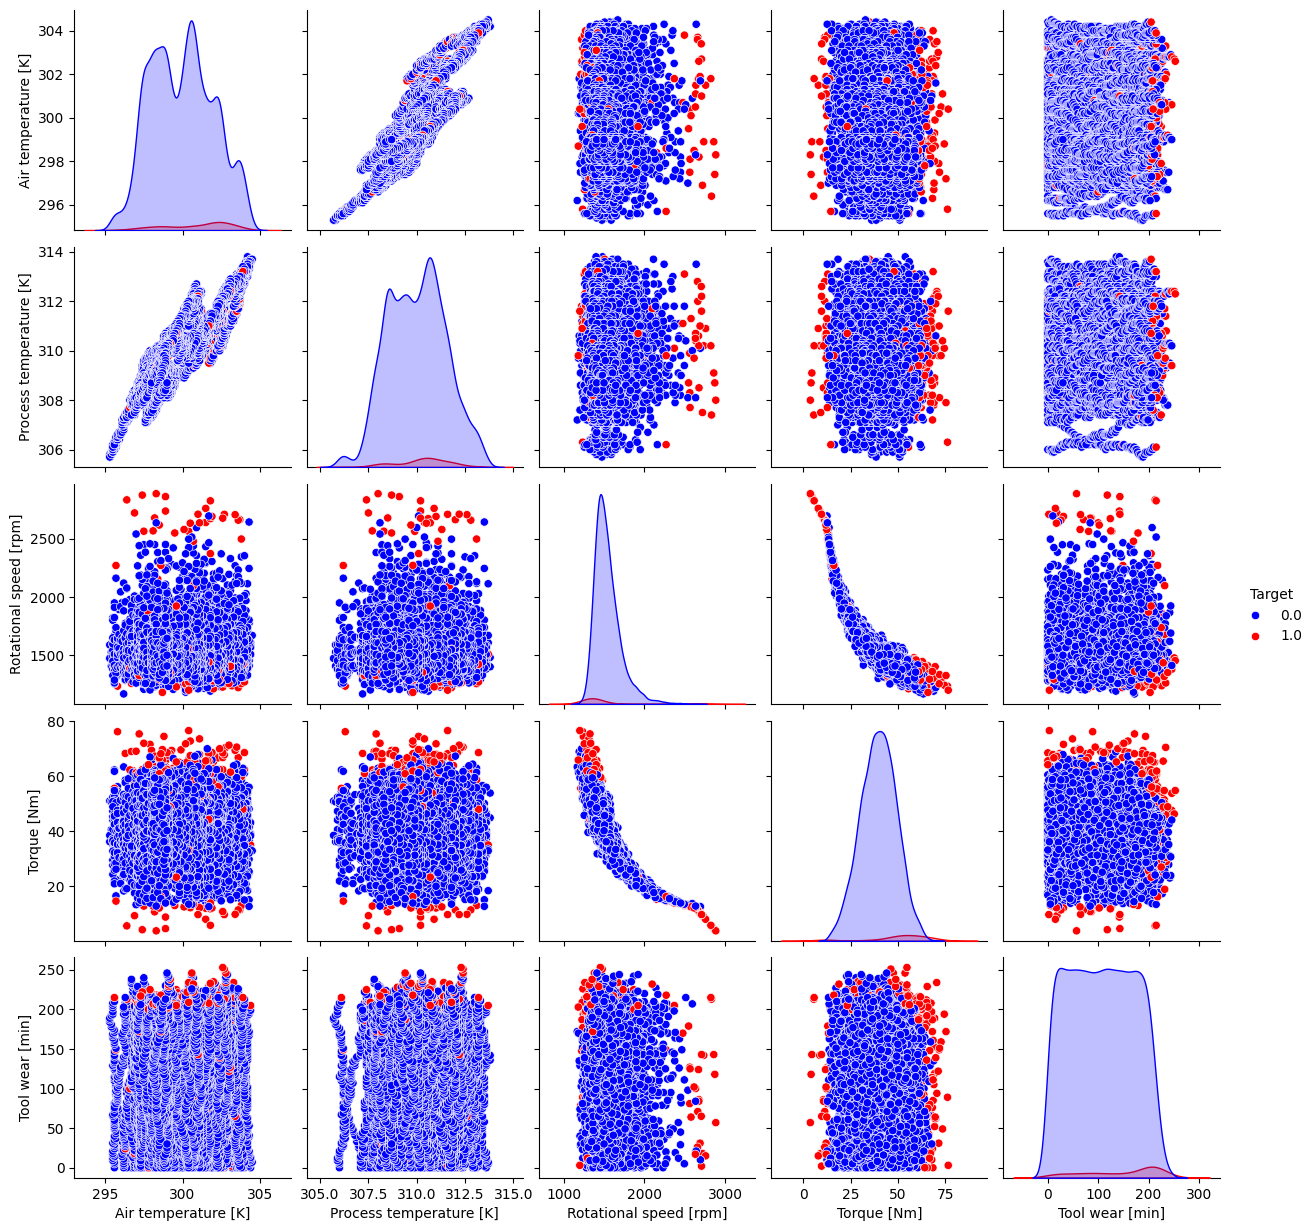

In [23]:
numeric_columns = df2.select_dtypes(include=['float64', 'int64'])

if 'Target' in df2.columns:
    correlation_matrix = numeric_columns.corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')

    if 'Target' in numeric_columns.columns:
        df2['Target'] = df2['Target'].astype('category')
        custom_palette = {0: 'blue', 1: 'red'}
        sns.pairplot(numeric_columns, hue='Target', palette=custom_palette) 
        plt.show()
    else:
        sns.pairplot(numeric_columns)
        plt.show()
else:
    print("'Target' column not found in the dataframe.")


Air temprature and Process Temprature are highly correlated
Torque and Rotational speed are highly correlated.
That means changes in one variable are associated with systematic changes in the other variable.

# Visualize the distribution of numeric features

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


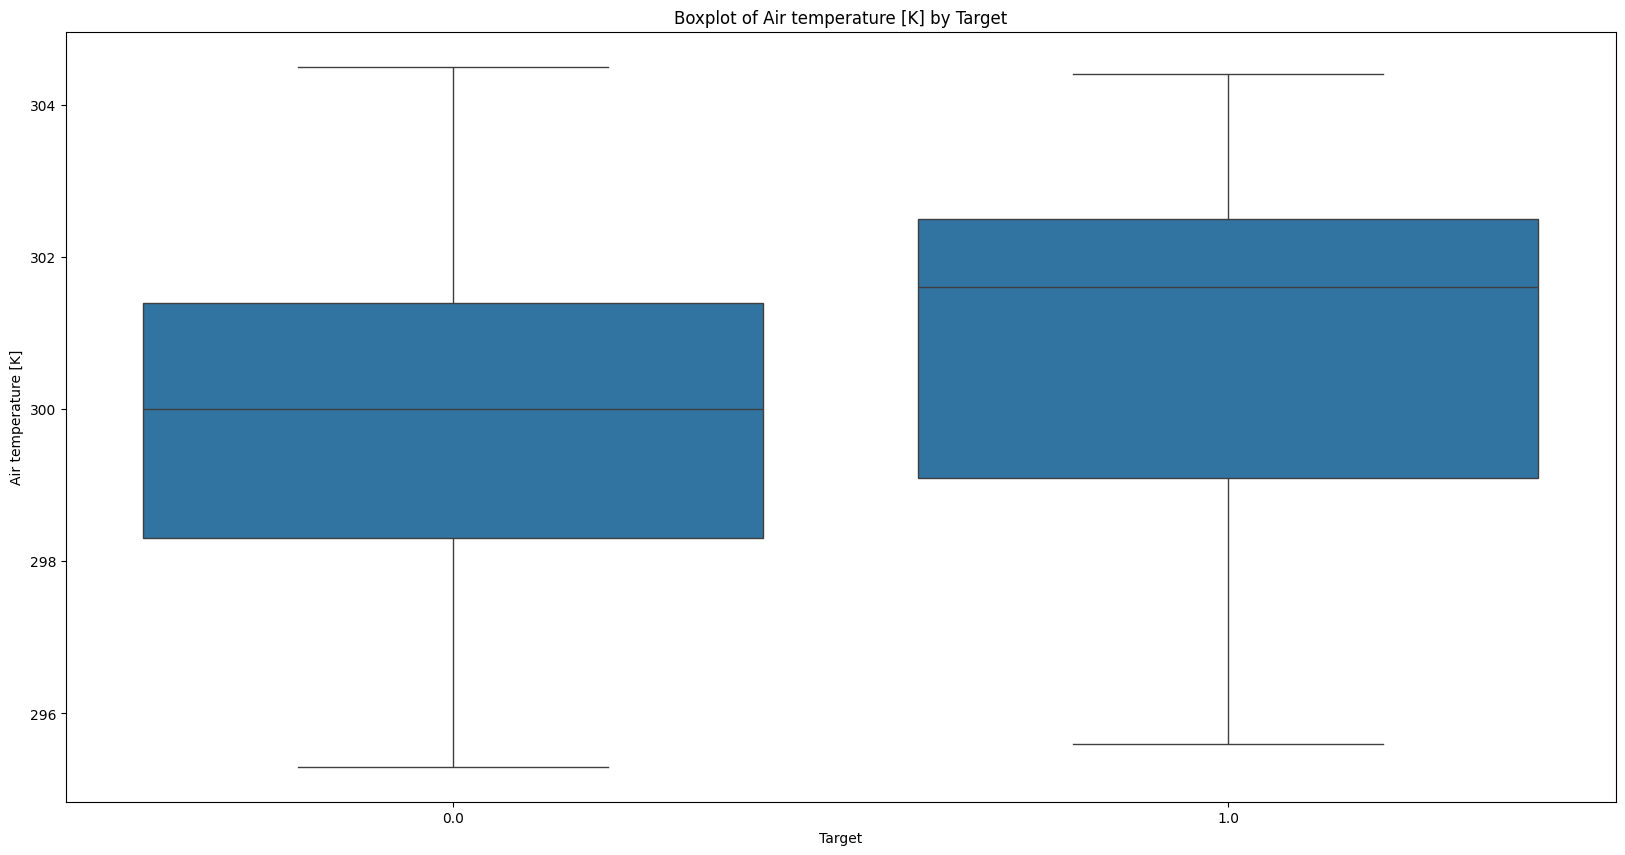

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


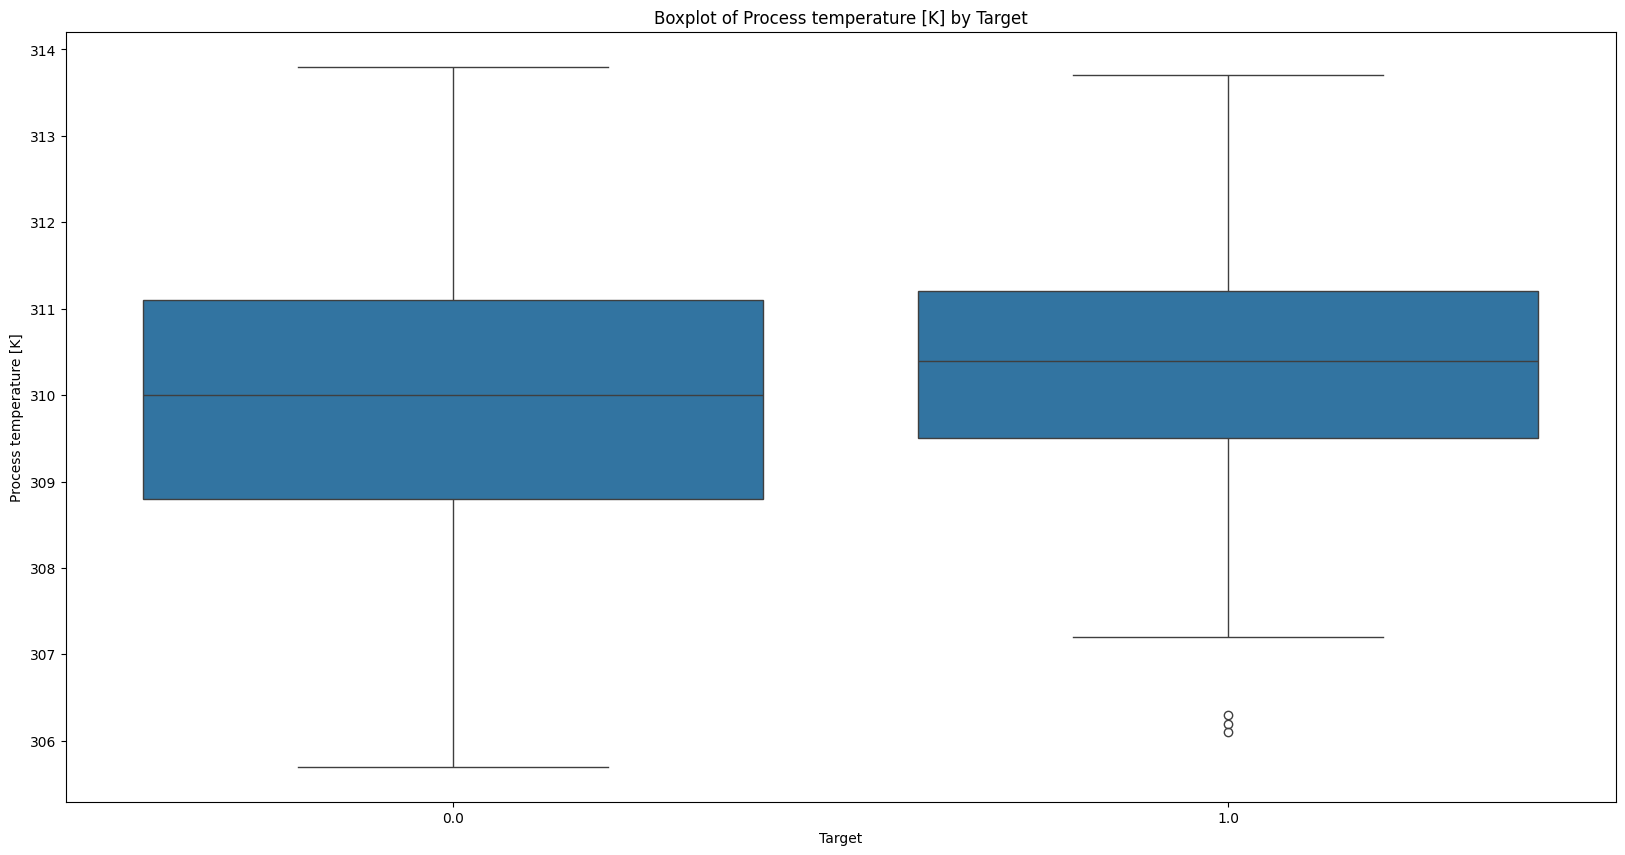

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


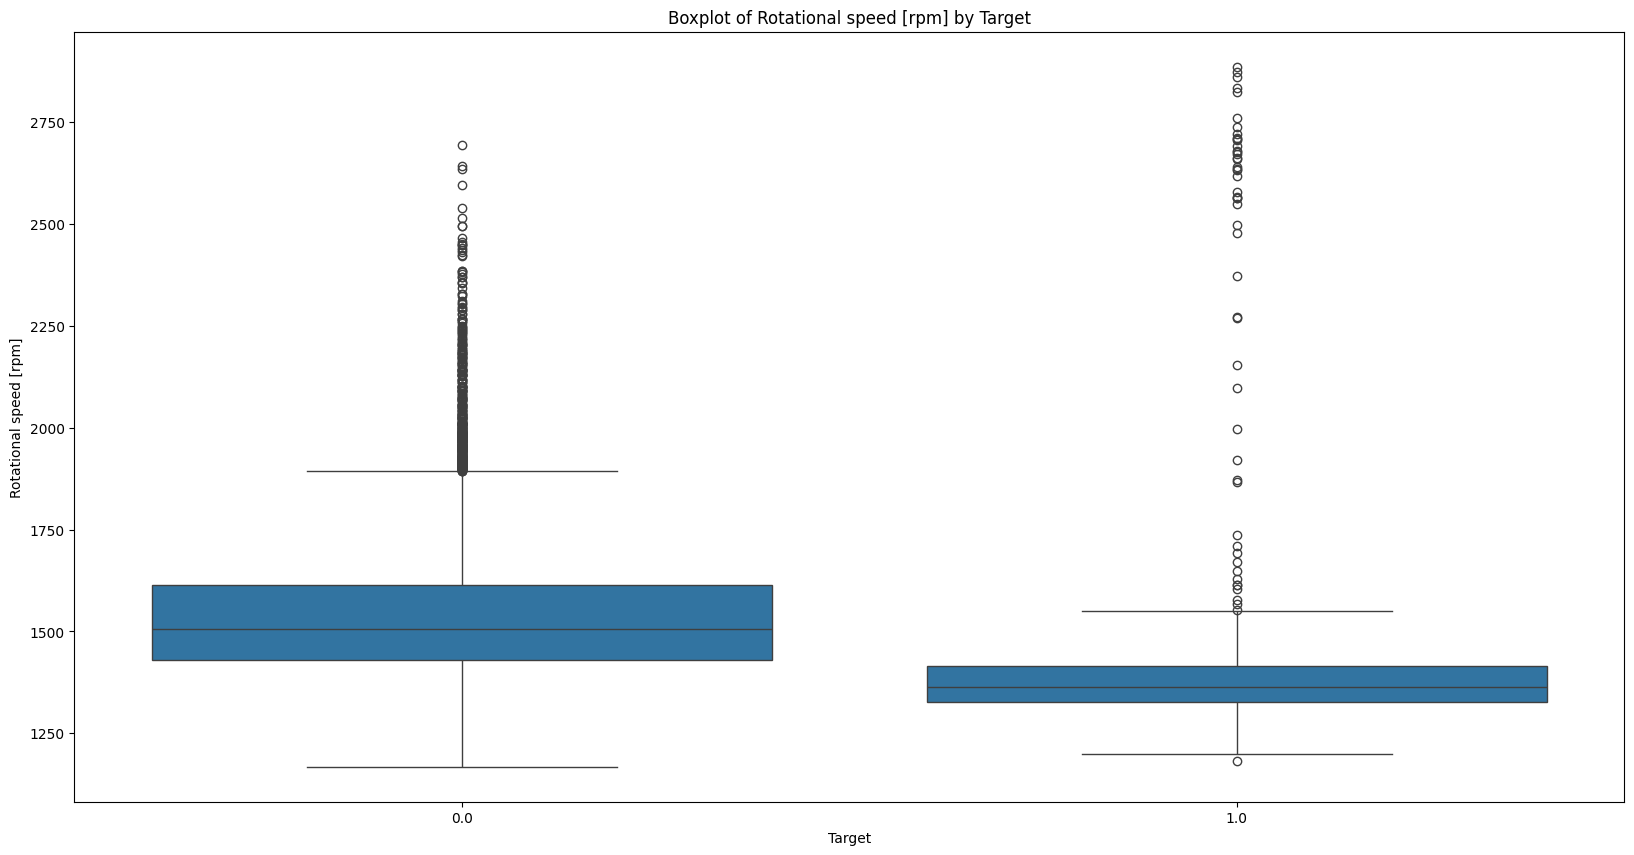

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


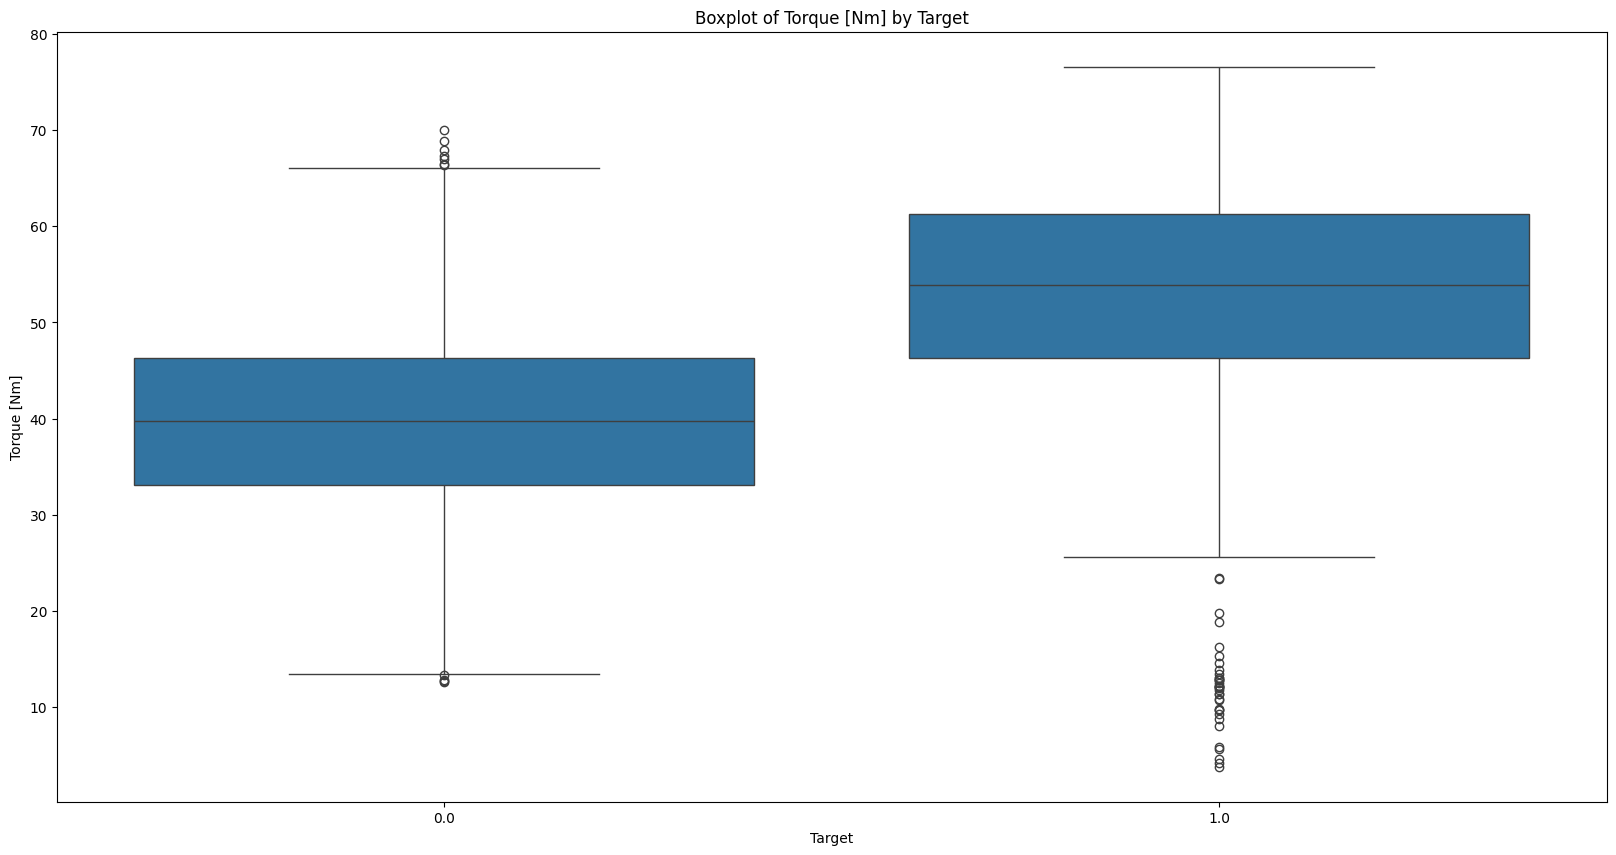

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


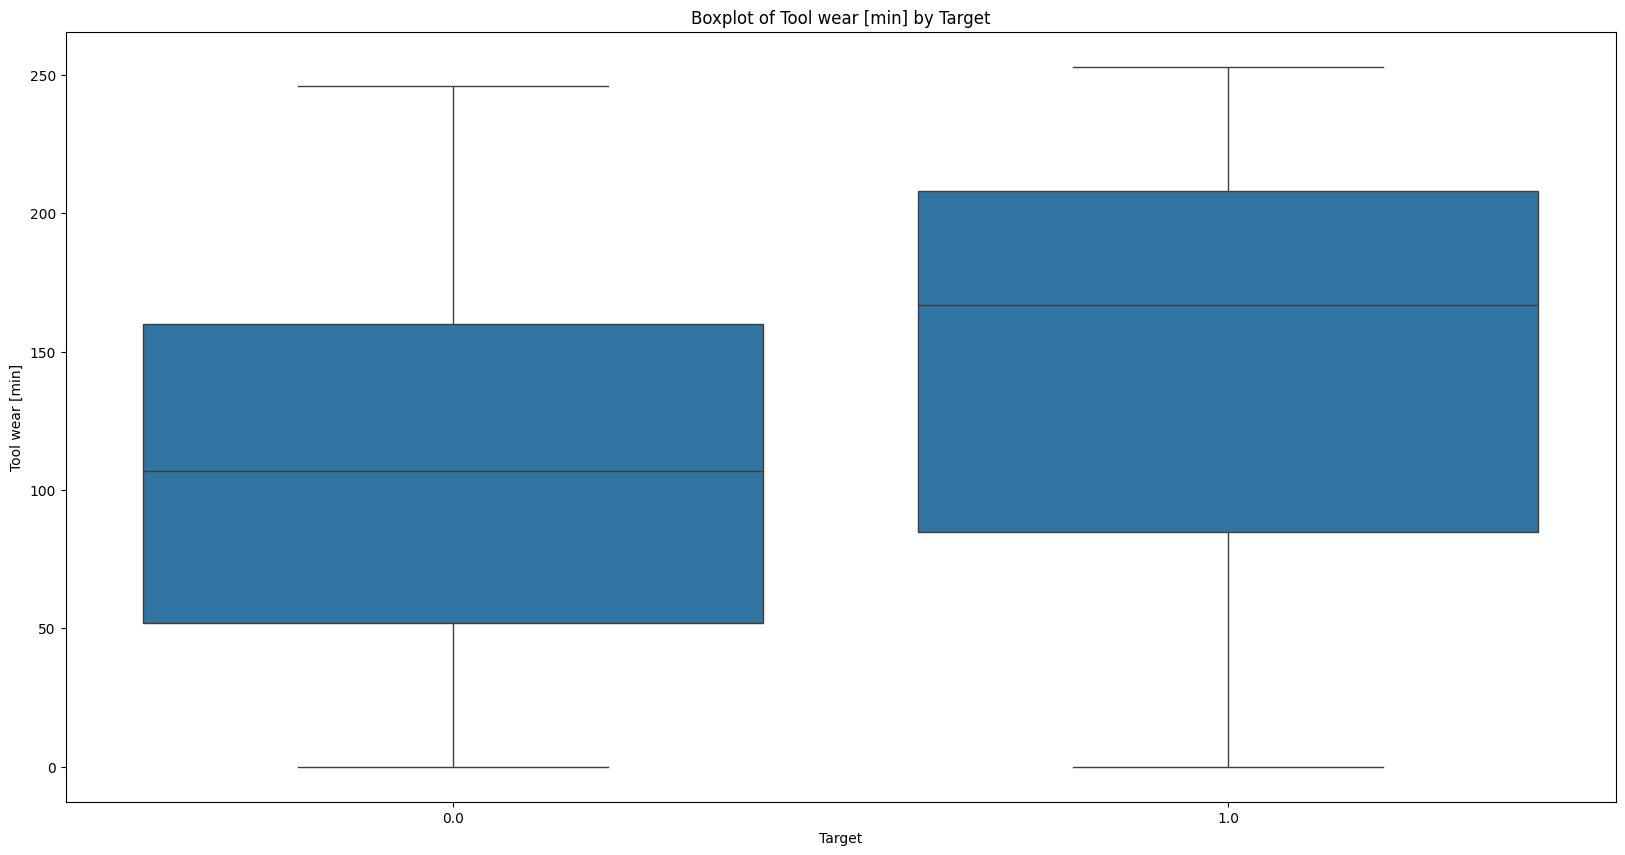

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


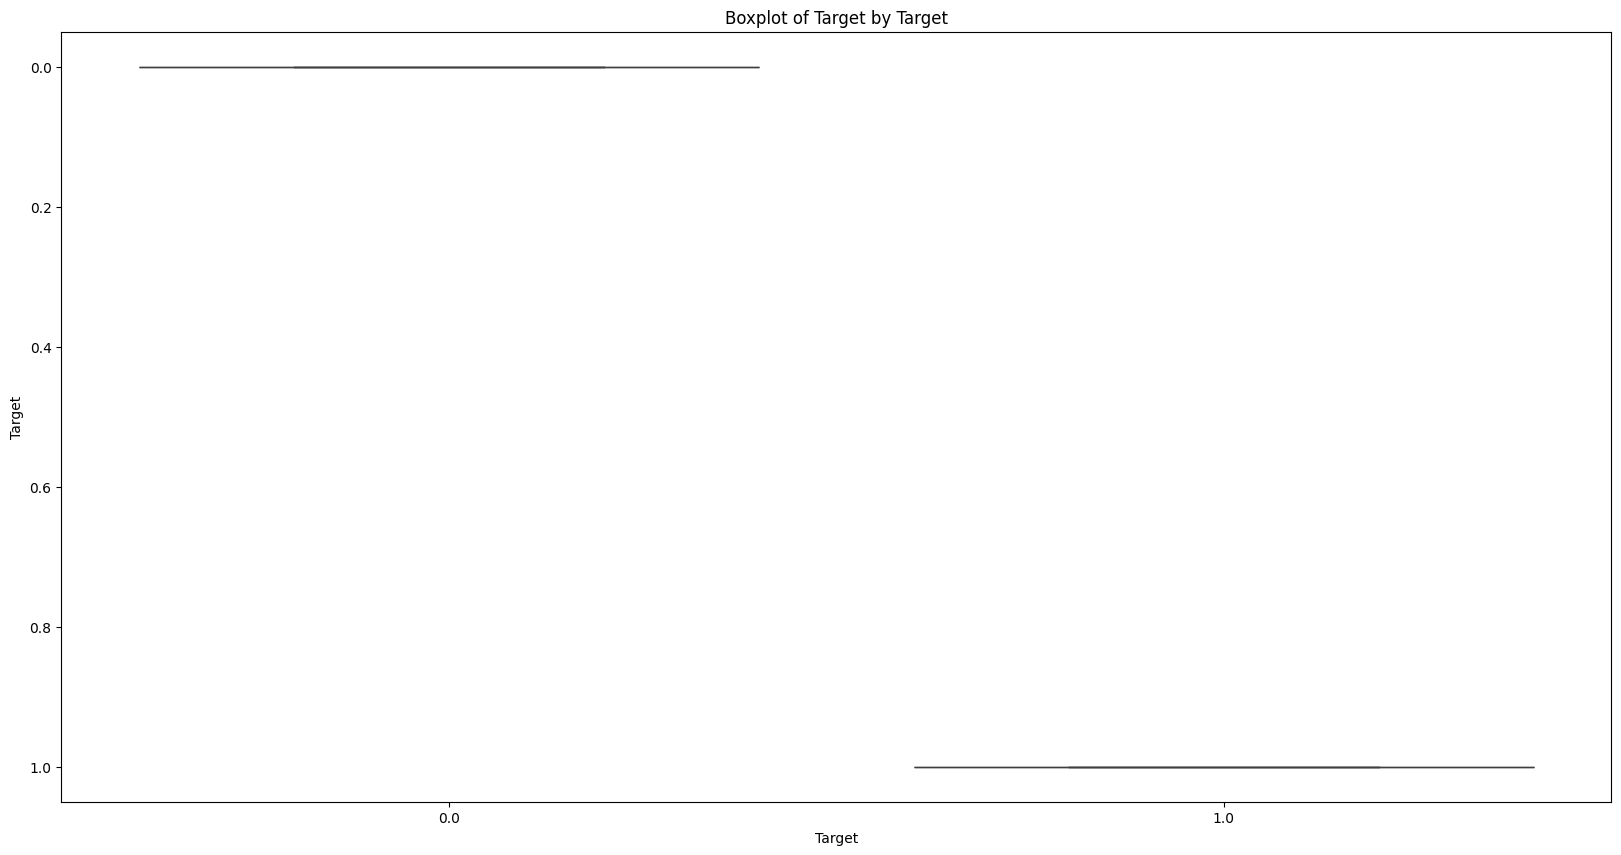

In [24]:
for column in numeric_columns.columns:
    sns.boxplot(x='Target', y=column, data=df2)
    plt.title(f'Boxplot of {column} by Target')
    plt.show()

from this we can see there are some outliers

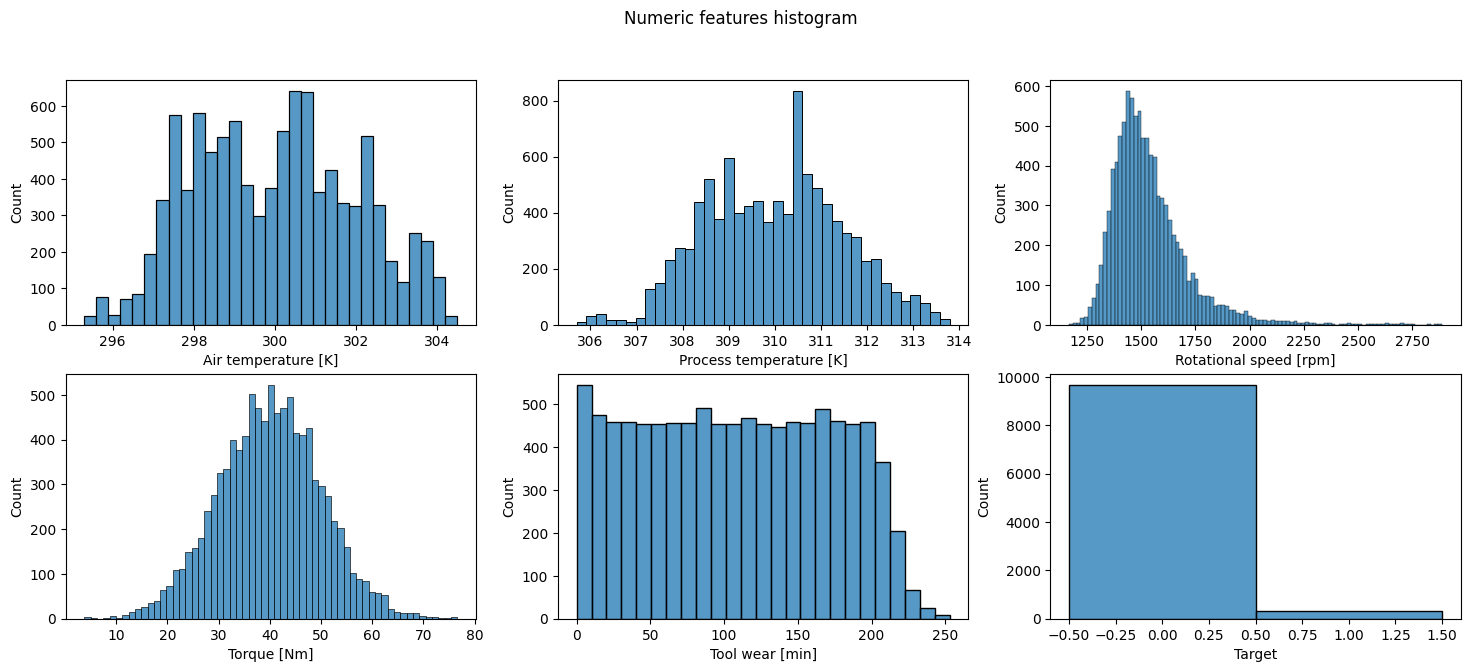

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Numeric features histogram')

for j, column in enumerate(numeric_columns.columns):
    sns.histplot(ax=axs[j // 3, j % 3], data=df2, x=column)

plt.show()


The boxplots show potential outliers in the data features mentioned. For Torque, the outliers identified might be due to the method used (boxplots), which isn't ideal for normally distributed data like Torque. Using the 3σ rule would be better. For Rotational Speed, the skewed Gaussian distribution suggests that some high-speed observations may fail. I'll keep these outliers for now and decide later if we need to address them after considering other factors.

# Target Variable Analysis

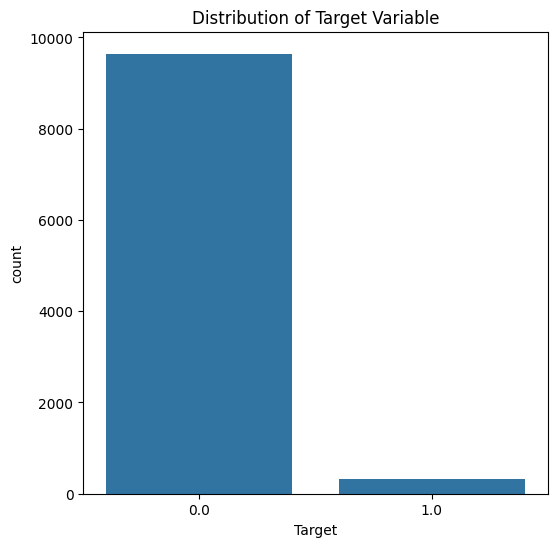

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6)) 
sns.countplot(x='Target', data=df2)
plt.title('Distribution of Target Variable')
plt.show()

In this also we can see there is data inbalace. now we solve this problem

There are three techniques we use to resolve this:
Under-sampling
Over-Sampling
Over-Sampling with SMOTE(Synthetic Minority Oversampling Technique)
I using the SMOTE procedure to generate new samples, which is very much like slightly moving the data point in the direction of its neighbors.

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
# n_working must represent 80% of the desired length of resampled dataframe
n_working = df2['Failure Type'].value_counts()['No Failure']
desired_length = round(n_working/0.8)
spc = round((desired_length-n_working)/4)  #samples per class
# Resampling
balance_cause = {'No Failure':n_working,
                 'Overstrain Failure':spc,
                 'Heat Dissipation Failure':spc,
                 'Power Failure':spc,
                 'Tool Wear Failure':spc}
sm = SMOTENC(categorical_features=[0,7], sampling_strategy=balance_cause, random_state=0)
df3, y_res = sm.fit_resample(df2, df2['Failure Type'])

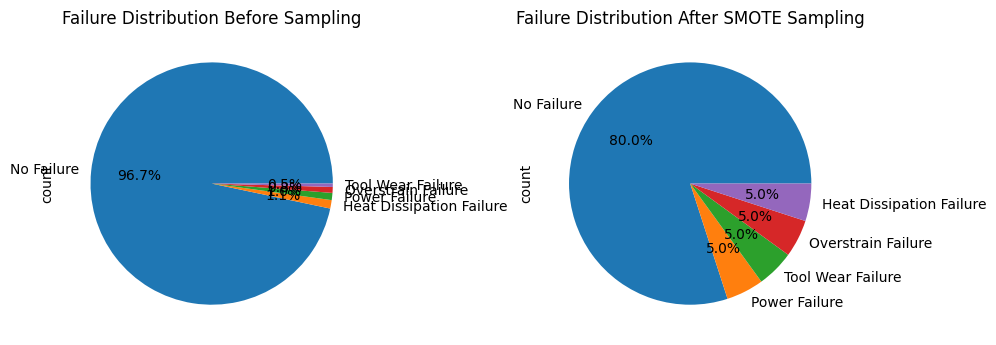

Percentage increment of observations after oversampling: 20.88%

Resampled Failures Percentage:
Failure Type
No Failure                  79.991705
Heat Dissipation Failure     0.929075
Power Failure                0.788055
Overstrain Failure           0.647034
Tool Wear Failure            0.373289
Name: count, dtype: float64


In [28]:



n_after_oversampling = len(df3)
percentage_increment = ((n_after_oversampling - len(df2)) / len(df2)) * 100

resampled_failure_percentage = (df2['Failure Type'].value_counts() / len(df3)) * 100

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Failure Distribution Before Sampling')
df2['Failure Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Failure Distribution After SMOTE Sampling')
df3['Failure Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.tight_layout()
plt.show()

print("Percentage increment of observations after oversampling: {:.2f}%".format(percentage_increment))
print("\nResampled Failures Percentage:")
print(resampled_failure_percentage)


# Encoding the object tpe into numeric values

using Label encoder for Failure Type columns
Label encoding is a technique used to convert categorical data into numerical data. In Python, you can use the LabelEncoder class from the scikit-learn library to perform label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()

df3['Failure Type_encoded'] = label_encoder.fit_transform(df3['Failure Type'])

df3['Failure Type_encoded'].value_counts()

Failure Type_encoded
1    9643
3     603
4     603
2     603
0     603
Name: count, dtype: int64

In [31]:
failure_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the unique encoded failure types and their names
print("Encoded Failure Types and Their Names:")
for encoded_type, name in failure_type_mapping.items():
    print(f"Encoded: {encoded_type}, Name: {name}")

Encoded Failure Types and Their Names:
Encoded: Heat Dissipation Failure, Name: 0
Encoded: No Failure, Name: 1
Encoded: Overstrain Failure, Name: 2
Encoded: Power Failure, Name: 3
Encoded: Tool Wear Failure, Name: 4


In [32]:
df3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_encoded
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure,1
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure,1
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure,1
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,No Failure,1
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,No Failure,1


In [33]:
df3.drop('Failure Type', axis='columns', inplace=True)
df3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_encoded
0,M,298.1,308.6,1551.0,42.8,0.0,0.0,1
1,L,298.2,308.7,1408.0,46.3,3.0,0.0,1
2,L,298.1,308.5,1498.0,49.4,5.0,0.0,1
3,L,298.2,308.6,1433.0,39.5,7.0,0.0,1
4,L,298.2,308.7,1408.0,40.0,9.0,0.0,1


Performing One hot encoding 

In [34]:
bool_dummies=pd.get_dummies(df3['Type'],prefix='Type')
dummies=bool_dummies.astype(int)
dummies

,Type_H,Type_L,Type_M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
12050,0,1,0
12051,0,1,0
12052,0,1,0
12053,0,1,0


In [35]:
merged=pd.concat([df3,dummies],axis='columns')
merged

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_encoded,Type_H,Type_L,Type_M
0,M,298.100000,308.600000,1551.000000,42.800000,0.000000,0.0,1,0,0,1
1,L,298.200000,308.700000,1408.000000,46.300000,3.000000,0.0,1,0,1,0
2,L,298.100000,308.500000,1498.000000,49.400000,5.000000,0.0,1,0,1,0
3,L,298.200000,308.600000,1433.000000,39.500000,7.000000,0.0,1,0,1,0
4,L,298.200000,308.700000,1408.000000,40.000000,9.000000,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12050,L,301.868728,311.076398,1406.303810,46.522712,207.613558,1.0,4,0,1,0
12051,L,301.603064,312.337390,1519.757447,37.796936,211.454468,1.0,4,0,1,0
12052,L,301.722627,310.696221,1688.942875,30.433963,217.660369,1.0,4,0,1,0
12053,L,299.539127,308.759276,1608.397658,33.261511,228.997871,1.0,4,0,1,0


In [36]:
df4=merged.drop(['Type','Type_L'],axis='columns')
df4

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_encoded,Type_H,Type_M
0,298.100000,308.600000,1551.000000,42.800000,0.000000,0.0,1,0,1
1,298.200000,308.700000,1408.000000,46.300000,3.000000,0.0,1,0,0
2,298.100000,308.500000,1498.000000,49.400000,5.000000,0.0,1,0,0
3,298.200000,308.600000,1433.000000,39.500000,7.000000,0.0,1,0,0
4,298.200000,308.700000,1408.000000,40.000000,9.000000,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
12050,301.868728,311.076398,1406.303810,46.522712,207.613558,1.0,4,0,0
12051,301.603064,312.337390,1519.757447,37.796936,211.454468,1.0,4,0,0
12052,301.722627,310.696221,1688.942875,30.433963,217.660369,1.0,4,0,0
12053,299.539127,308.759276,1608.397658,33.261511,228.997871,1.0,4,0,0


Removing outliers

In [37]:
columns_to_check = ['Rotational speed [rpm]', 'Torque [Nm]']


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


final = remove_outliers_iqr(df4, columns_to_check)


print("Shape before removing outliers:", df4.shape)
print("Shape after removing outliers:", final.shape)

Shape before removing outliers: (12055, 9)
Shape after removing outliers: (11426, 9)


# Model Selection

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = (df4['Target'].astype(int).astype(str) + '_' + df4['Failure Type_encoded'].astype(int).astype(str)).astype(int)

X = df4.drop(['Target','Failure Type_encoded'],axis='columns')
df4['Target'].astype(str) + '_' + df4['Failure Type_encoded'].astype(str) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)



In [39]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.33958360846744684

In [40]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train,y_train)
lg_clf.score(X_test,y_test)


c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8606387391124015

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)



# Finding best module

In [42]:
l_scores=cross_val_score(LogisticRegression(), X, y, cv=cv)
print(l_scores)
np.average(l_scores)

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

[0.86063874 0.88220655 0.85732061 0.84197428 0.86603069]


c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

0.86163417669017

In [43]:
d_scores=cross_val_score(DecisionTreeClassifier(),X,y,cv=cv)
print(d_scores)
np.average(d_scores)

[0.96350062 0.96391539 0.97262547 0.96101203 0.96391539]


0.964993778515139

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [45]:


model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 100]
        },
        'cv': cv
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy','log_loss'],
        },
        'cv': cv
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {},
        'cv': cv
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {},
        'cv': cv
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {},
        'cv': cv
    }
}


In [46]:
scores=[]

for model_name,mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=15, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SHERONE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

,model,best_score,best_params
0,random_forest,0.967488,{'n_estimators': 100}
1,decision_tree,0.961352,{'criterion': 'entropy'}
2,logistic_regression,0.865288,{}
3,naive_bayes_gaussian,0.857085,{}
4,naive_bayes_multinomial,0.463959,{}


<b>Random Forest<b> is the best model 

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [48]:

model_scores=cross_val_score(RandomForestClassifier(n_estimators=200), X, y, cv=cv)
print(model_scores)
np.average(model_scores)

[0.98092078 0.98175031 0.98009125 0.97718789 0.97843219]


0.9796764827872252

In [62]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
y_predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_predict_train)
print("Training Data Accuracy:", accuracy_train)
precision_train = precision_score(y_train, y_predict_train,average='weighted')
print("Training Data Precision:", precision_train)
recall_train = recall_score(y_train, y_predict_train,average='weighted')
print("Training Data Recall:", recall_train)
f1_train = f1_score(y_train, y_predict_train,average='weighted')
print("Training Data F1-score:", f1_train)

Training Data Accuracy: 0.9998963085856492
Training Data Precision: 0.9998965232676664
Training Data Recall: 0.9998963085856492
Training Data F1-score: 0.999896308136528


In [56]:
import pickle
with open('predictive_model.pickle','wb') as f:
    pickle.dump(model,f)
    

In [57]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_M'],
      dtype='object')

In [ ]:
final.head(100)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_encoded,Type_H,Type_M
0,298.1,308.6,1551.0,42.8,0.0,0.0,1,0,1
1,298.2,308.7,1408.0,46.3,3.0,0.0,1,0,0
2,298.1,308.5,1498.0,49.4,5.0,0.0,1,0,0
3,298.2,308.6,1433.0,39.5,7.0,0.0,1,0,0
4,298.2,308.7,1408.0,40.0,9.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...
98,298.9,308.8,1529.0,32.7,53.0,0.0,1,0,0
99,298.8,308.8,1523.0,44.4,55.0,0.0,1,0,0
100,298.8,308.9,1852.0,25.0,57.0,0.0,1,0,0
102,298.8,308.8,1555.0,40.6,61.0,0.0,1,0,0


In [ ]:
feature_names_in_fit = model.feature_names_in_
print("Feature names seen at fit time:", feature_names_in_fit)

Feature names seen at fit time: ['Air temperature [K]' 'Process temperature [K]' 'Rotational speed [rpm]'
 'Torque [Nm]' 'Tool wear [min]' 'Type_H' 'Type_M']


In [ ]:
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_M
6456,300.500000,309.700000,1384.000000,48.600000,141.000000,0,0
2572,299.400000,309.300000,1391.000000,46.600000,185.000000,0,0
8763,297.400000,308.500000,1471.000000,43.900000,45.000000,0,0
8411,298.700000,309.900000,1371.000000,51.300000,201.000000,0,0
11672,300.383497,310.948525,1383.602187,47.065027,216.990164,1,0
...,...,...,...,...,...,...,...
4859,303.700000,312.400000,1631.000000,28.500000,132.000000,0,1
3264,301.300000,310.000000,1593.000000,30.800000,210.000000,0,1
9845,298.900000,309.900000,1373.000000,52.100000,108.000000,0,0
10799,299.274951,309.361931,1377.250495,51.711634,218.126236,0,0


In [ ]:
y_train

6456      1
2572      1
8763      1
8411      1
11672    14
         ..
4859      1
3264      1
9845      1
10799    12
2732      1
Length: 9644, dtype: int32

In [ ]:
unique_values = y_train.unique()
unique_values

array([ 1, 14, 12, 13, 10])

In [ ]:

import pickle

# Load the trained model
with open("predictive_model.pickle", "rb") as f:
    model = pickle.load(f)

def predict_failure(*args):
    machine_type = args[5]
    if machine_type not in ['M', 'H', 'L']:
        return "Invalid machine type. Please provide 'M', 'H', or 'L'", None, None

    data = {
        'Air temperature [K]': [args[0]],
        'Process temperature [K]': [args[1]],
        'Rotational speed [rpm]': [args[2]],
        'Torque [Nm]': [args[3]],
        'Tool wear [min]': [args[4]],
        'Type_H': [1 if machine_type == 'H' else 0],
        'Type_M': [1 if machine_type == 'M' else 0]
    }

    df = pd.DataFrame(data)
    predictions = model.predict(df)

    failure_type_mapping = {
        10: 'Heat Dissipation Failure',
        1: 'No Failure',
        12: 'Overstrain Failure',
        13: 'Power Failure',
        14: 'Tool Wear Failure'
    }

    predicted_failure_type_encoded = int(predictions[0])
    predicted_failure_type_name = failure_type_mapping.get(predicted_failure_type_encoded, "Unknown Failure Type")

    if predicted_failure_type_name in ["Heat Dissipation Failure", "Overstrain Failure", "Power Failure", "Tool Wear Failure"]:
        predicted_target = 1
    elif predicted_failure_type_name == "No Failure":
        predicted_target = 0
    else:
        predicted_target = 1

    return predicted_failure_type_name, predicted_failure_type_encoded, predicted_target

# Sample input values
air_temp = 299.274951
process_temp = 309.361931
rotational_speed = 1377.250495
torque = 51.711634
tool_wear = 218.126236
machine_type = 'L'

# Perform prediction
failure_type, failure_type_encoded, predicted_target = predict_failure(air_temp, process_temp, rotational_speed, torque, tool_wear, machine_type)

print("Failure Type:", failure_type)
print("Failure Type ID:", failure_type_encoded)
print("Predicted Target:", predicted_target)


Failure Type: Overstrain Failure
Failure Type ID: 12
Predicted Target: 1


In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    json.dump(columns,f)